In [15]:
!pip install simpleitk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 18.5 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import glob

import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import widgets, interactive

In [17]:
file_folders = sorted(glob.glob('/content/drive/MyDrive/SynthRAD2025/Task1/*/*'))

In [18]:
file_folders

['/content/drive/MyDrive/SynthRAD2025/Task1/HN/1HND007',
 '/content/drive/MyDrive/SynthRAD2025/Task1/HN/1HND045',
 '/content/drive/MyDrive/SynthRAD2025/Task1/HN/1HND076',
 '/content/drive/MyDrive/SynthRAD2025/Task1/HN/1HND095']

In [19]:
def get_data(folder):
    # Get the filenames dynamically
    mr_filename = os.path.join(folder, 'mr.mha')
    mask_filename = os.path.join(folder, 'mask.mha')
    ct_filename = os.path.join(folder, 'ct.mha')

    # Read the .mha files
    mr_image = sitk.ReadImage(mr_filename)
    mask_image = sitk.ReadImage(mask_filename)
    ct_image = sitk.ReadImage(ct_filename)

    # Convert the images to numpy arrays
    mr_image_array = sitk.GetArrayFromImage(mr_image)
    mask_image_array = sitk.GetArrayFromImage(mask_image)
    ct_image_array = sitk.GetArrayFromImage(ct_image)

    return mr_image_array, mask_image_array, ct_image_array

# Example usage
mr_image_array, mask_image_array, ct_image_array = get_data(file_folders[0])


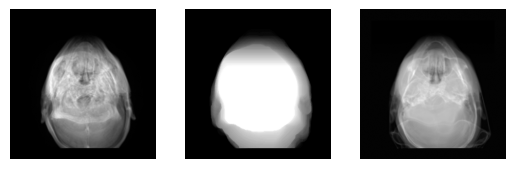

In [25]:
# Display the image
plt.figure()
plt.subplot(1,3,1)
plt.imshow(mr_image_array[30:].mean(axis=0), cmap='gray')
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(mask_image_array[30:].mean(axis=0), cmap='gray')
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(ct_image_array[30:].mean(axis=0), cmap='gray')
plt.axis("off")
plt.show()

In [27]:
def create_slice_show(mr, ct):
  @interactive
  def show_slice(slice_index=widgets.IntSlider(min=0, max=mr.shape[0]-1, step=1, value=1)):
      plt.figure(figsize=(12, 6))
      plt.subplot(1,2,1)
      plt.imshow(mr[slice_index], cmap='gray')
      plt.title(f'MRI Slice {slice_index}')
      plt.axis('off')
      plt.subplot(1,2,2)
      plt.imshow(ct[slice_index], cmap='gray')
      plt.title(f'CT Slice {slice_index}')
      plt.axis('off')
      plt.show()

  display(show_slice)

In [29]:
mr_image_array, mask_image_array, ct_image_array = get_data(file_folders[1])
create_slice_show(mr_image_array, ct_image_array)

interactive(children=(IntSlider(value=1, description='slice_index', max=87), Output()), _dom_classes=('widget-…